In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
columns = ["Image_Id","gt_total", "gt_date","gt_time", "pred_total", "pred_date", "pred_time", "conf_total", "conf_time","conf_date"]

In [4]:
df = pd.read_csv("data/Assigment 2 - Train.txt", sep="|", names=columns)
test = pd.read_csv("data/Assignment 2 - Test.txt", sep="|", names=columns)

In [5]:
df.head()

,Image_Id,gt_total,gt_date,gt_time,pred_total,pred_date,pred_time,conf_total,conf_time,conf_date
0,1,160,2016-09-11,13:52:00,160,2016-03-11,13:52:00,-0.001974,-1.180410,-0.008496
1,3,195,2016-09-23,18:52:00,195,2016-09-23,18:52:00,-0.011053,-0.864236,-0.018932
2,4,145,2016-10-02,15:58:00,145,2017-10-18,15:58:00,-0.002920,-2.266910,-0.978772
3,4,243,2016-09-26,18:25:00,243,2017-09-26,18:25:00,-0.075094,-0.810062,-0.123047
4,6,71,2016-09-19,13:47:00,71,2016-08-19,13:47:00,-0.014107,-0.664796,-0.003986


In [6]:
df.isnull().sum()

Image_Id      0
gt_total      0
gt_date       0
gt_time       0
pred_total    0
pred_date     0
pred_time     0
conf_total    0
conf_time     0
conf_date     0
dtype: int64

In [7]:
# df["gt_date"].value_counts()

In [8]:
# df["gt_time"].value_counts()

In [9]:
# df["gt_total"].value_counts()

In [10]:
# df["pred_date"].value_counts()

In [11]:
# df["pred_time"].value_counts()

In [12]:
# df["pred_total"].value_counts()

In [13]:
# df[df["pred_time"] == "noTime"]

In [14]:
# test[test["pred_time"] == "noTime"]

In [15]:
time_df = df[df["pred_time"] != "noTime"]

In [16]:
time_test_df = test[test["pred_time"] != "noTime"]

In [17]:
df["gt_date"] = pd.to_datetime(df["gt_date"])
df["gt_time"] = pd.to_datetime(df["gt_time"])
df["pred_date"] = pd.to_datetime(df["pred_date"])
# df["pred_time"] = pd.to_datetime(df["pred_time"])

In [18]:
test["gt_date"] = pd.to_datetime(test["gt_date"])
test["gt_time"] = pd.to_datetime(test["gt_time"])
test["pred_date"] = pd.to_datetime(test["pred_date"])

In [19]:
df.dtypes

Image_Id               int64
gt_total               int64
gt_date       datetime64[ns]
gt_time       datetime64[ns]
pred_total             int64
pred_date     datetime64[ns]
pred_time             object
conf_total           float64
conf_time            float64
conf_date            float64
dtype: object

In [20]:
df.head()

,Image_Id,gt_total,gt_date,gt_time,pred_total,pred_date,pred_time,conf_total,conf_time,conf_date
0,1,160,2016-09-11,2017-07-20 13:52:00,160,2016-03-11,13:52:00,-0.001974,-1.180410,-0.008496
1,3,195,2016-09-23,2017-07-20 18:52:00,195,2016-09-23,18:52:00,-0.011053,-0.864236,-0.018932
2,4,145,2016-10-02,2017-07-20 15:58:00,145,2017-10-18,15:58:00,-0.002920,-2.266910,-0.978772
3,4,243,2016-09-26,2017-07-20 18:25:00,243,2017-09-26,18:25:00,-0.075094,-0.810062,-0.123047
4,6,71,2016-09-19,2017-07-20 13:47:00,71,2016-08-19,13:47:00,-0.014107,-0.664796,-0.003986


# Predicting Total Variable

In [21]:
total_df = df[["Image_Id", "gt_total", "pred_total", "conf_total"]]

In [22]:
test_total = test[["Image_Id", "gt_total", "pred_total", "conf_total"]]

In [23]:
total_df.head()

,Image_Id,gt_total,pred_total,conf_total
0,1,160,160,-0.001974
1,3,195,195,-0.011053
2,4,145,145,-0.002920
3,4,243,243,-0.075094
4,6,71,71,-0.014107


In [24]:
total_df["total_label"] = df.apply(lambda x: 1 if x["gt_total"] == x["pred_total"] else 0, axis=1)

In [25]:
test_total["total_label"] = df.apply(lambda x: 1 if x["gt_total"] == x["pred_total"] else 0, axis=1)

In [26]:
total_df["total_label"].value_counts()

1    4542
0     458
Name: total_label, dtype: int64

In [27]:
total_df["gt_total"].max()

54196

In [28]:
total_df[total_df["gt_total"]>10000]["total_label"].value_counts()

1    24
0     9
Name: total_label, dtype: int64

In [29]:
def convert_string(x):
    _str_len = 5
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

In [30]:
total_df.columns

Index(['Image_Id', 'gt_total', 'pred_total', 'conf_total', 'total_label'], dtype='object')

In [31]:
# total_df["gt_total"] = total_df["gt_total"].apply(convert_string)
total_df["pred_total"] = total_df["pred_total"].apply(convert_string)

In [32]:
# test_total["gt_total"] = test_total["gt_total"].apply(convert_string)
test_total["pred_total"] = test_total["pred_total"].apply(convert_string)

In [33]:
total_df.dtypes

Image_Id         int64
gt_total         int64
pred_total      object
conf_total     float64
total_label      int64
dtype: object

In [34]:
for pos in range(0,5):
#     total_df[str(pos+1)+"_digit_gt"] = total_df["gt_total"].apply(lambda x: x[pos])
    total_df[str(pos+1)+"_digit_pred"] = total_df["pred_total"].apply(lambda x: x[pos])
#     test_total[str(pos+1)+"_digit_gt"] = test_total["gt_total"].apply(lambda x: x[pos])
    test_total[str(pos+1)+"_digit_pred"] = test_total["pred_total"].apply(lambda x: x[pos])

In [35]:
total_df.head()

,Image_Id,gt_total,pred_total,conf_total,total_label,1_digit_pred,2_digit_pred,3_digit_pred,4_digit_pred,5_digit_pred
0,1,160,00160,-0.001974,1,0,0,1,6,0
1,3,195,00195,-0.011053,1,0,0,1,9,5
2,4,145,00145,-0.002920,1,0,0,1,4,5
3,4,243,00243,-0.075094,1,0,0,2,4,3
4,6,71,00071,-0.014107,1,0,0,0,7,1


In [36]:
# total_df["conf_total"]=(total_df["conf_total"]-total_df["conf_total"].mean())/total_df["conf_total"].std()
# test_total["conf_total"]=(test_total["conf_total"]-test_total["conf_total"].mean())/test_total["conf_total"].std()

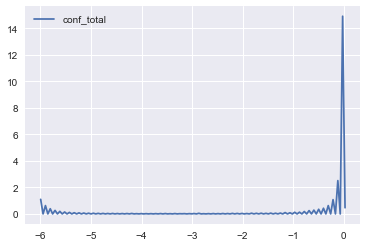

In [37]:
sns.kdeplot(total_df["conf_total"])

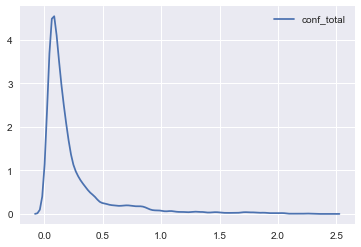

In [38]:
sns.kdeplot(np.sqrt(total_df["conf_total"]*-1))

In [39]:
total_df["conf_total"] = total_df["conf_total"]*-1
test_total["conf_total"] = test_total["conf_total"]*-1

total_df["conf_total"] = np.sqrt(total_df["conf_total"])
test_total["conf_total"] = np.sqrt(test_total["conf_total"])

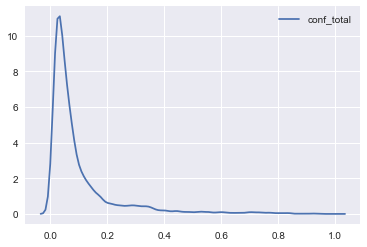

In [40]:
sns.kdeplot((total_df["conf_total"]-total_df["conf_total"].min())/(total_df["conf_total"].max()-total_df["conf_total"].min()))

In [41]:
# total_df["conf_total"]=(total_df["conf_total"]-total_df["conf_total"].min())/(total_df["conf_total"].max()-total_df["conf_total"].min())
# test_total["conf_total"]=(test_total["conf_total"]-test_total["conf_total"].min())/(test_total["conf_total"].max()-test_total["conf_total"].min())

In [42]:
total_df["conf_total"]=(total_df["conf_total"]-total_df["conf_total"].mean())/total_df["conf_total"].std()
test_total["conf_total"]=(test_total["conf_total"]-test_total["conf_total"].mean())/test_total["conf_total"].std()

In [43]:
# total_q1 = total_df['conf_total'].quantile(.20)
# total_q2 = total_df['conf_total'].quantile(.80)

In [44]:
# total_mask = total_df['conf_total'].between(total_q1, total_q2, inclusive=True)

In [45]:
# total_df_x = total_df.loc[total_mask]

In [46]:
# total_df.shape

In [47]:
# total_df_x.shape

In [48]:
for col in total_df.columns:
    total_df[col] = pd.to_numeric(total_df[col])
    test_total[col] = pd.to_numeric(test_total[col])

In [49]:
X_total = total_df.drop(["Image_Id", "gt_total", "pred_total", "total_label"], axis=1)
y_total = total_df["total_label"]

In [50]:
X_total_test = test_total.drop(["Image_Id", "gt_total", "pred_total", "total_label"], axis=1)
y_total_test = test_total["total_label"]

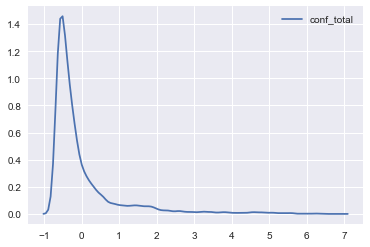

In [51]:
sns.kdeplot(total_df["conf_total"])

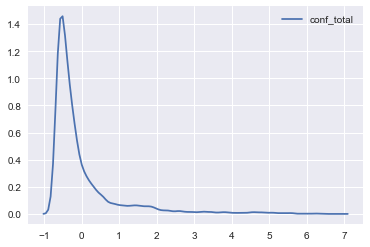

In [52]:
sns.kdeplot(X_total["conf_total"])

In [53]:
X_total.head()

,conf_total,1_digit_pred,2_digit_pred,3_digit_pred,4_digit_pred,5_digit_pred
0,-0.628195,0,0,1,6,0
1,-0.439147,0,0,1,9,5
2,-0.598274,0,0,1,4,5
3,0.086860,0,0,2,4,3
4,-0.396673,0,0,0,7,1


In [54]:
X_total_test.head()

,conf_total,1_digit_pred,2_digit_pred,3_digit_pred,4_digit_pred,5_digit_pred
0,-0.670997,0,0,7,7,1
1,-0.413121,0,2,0,5,4
2,0.779824,0,0,0,2,0
3,-0.536443,0,0,6,8,0
4,-0.558002,0,1,0,1,9


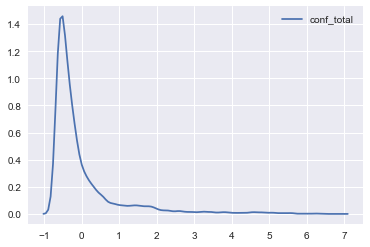

In [55]:
sns.kdeplot(X_total["conf_total"])

In [56]:
X_total_test.head()

,conf_total,1_digit_pred,2_digit_pred,3_digit_pred,4_digit_pred,5_digit_pred
0,-0.670997,0,0,7,7,1
1,-0.413121,0,2,0,5,4
2,0.779824,0,0,0,2,0
3,-0.536443,0,0,6,8,0
4,-0.558002,0,1,0,1,9


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

In [58]:
from xgboost import XGBClassifier

/home/iamnewneo/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
from sklearn.metrics import accuracy_score

In [60]:
rf = XGBClassifier()

In [61]:
# rf = RandomForestClassifier()

In [62]:
rf.fit(X_total,y_total)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [63]:
def get_scores(est, y, X):
    print("Accuracy score of model is: " + str(accuracy_score(y, est.predict(X))))
    print("F1 score of model is: " + str(f1_score(y, est.predict(X))))
    print("Precision score of model is: " + str(precision_score(y, est.predict(X))))
    print("Recall score of model is: " + str(recall_score(y, est.predict(X))))

In [64]:
get_scores(rf, y_total_test, X_total_test)

Accuracy score of model is: 0.866
F1 score of model is: 0.927252985885
Precision score of model is: 0.908510638298
Recall score of model is: 0.946784922395


In [65]:
rf.feature_importances_

array([ 0.574359  ,  0.0017094 ,  0.05299145,  0.15555556,  0.0940171 ,
        0.12136752], dtype=float32)

In [ ]:
# f1_score(y_total_test, rf.predict(X_total_test))

# precision_score(y_total_test, rf.predict(X_total_test))

# recall_score(y_total_test, rf.predict(X_total_test))

In [ ]:
# clf = RandomForestClassifier()
# param_grid = { "n_estimators": list(range(100,400,50)),
#            "criterion": ["entropy"],
#            "max_depth": list(range(2,20)),
#              }
# grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, scoring="f1")
# grid_search.fit(X_total, y_total)

In [ ]:
# grid_search.best_estimator_

In [ ]:
# get_scores(grid_search.best_estimator_, y_total_test, X_total_test)

# Predicting Time Variable

In [66]:
time_df.head()
time_df = time_df.drop(["gt_total", "gt_date", "pred_total", "pred_date", "conf_total", "conf_date"], axis=1)

In [67]:
time_test_df = time_test_df.drop(["gt_total", "gt_date", "pred_total", "pred_date", "conf_total", "conf_date"], axis=1)

In [68]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time
0,1,13:52:00,13:52:00,-1.180410
1,3,18:52:00,18:52:00,-0.864236
2,4,15:58:00,15:58:00,-2.266910
3,4,18:25:00,18:25:00,-0.810062
4,6,13:47:00,13:47:00,-0.664796


In [69]:
time_test_df.head()

,Image_Id,gt_time,pred_time,conf_time
0,4983,22:59:00,22:59:00,-1.782610
1,4984,00:31:00,00:31:00,-0.008186
2,4987,12:50:00,12:50:00,-0.581153
3,4988,21:26:00,21:26:00,-1.665860
4,4989,22:36:00,22:36:00,-1.693240


In [70]:
time_df["gt_time"] = pd.to_datetime(time_df["gt_time"])
time_df["pred_time"] = pd.to_datetime(time_df["pred_time"])

time_test_df["gt_time"] = pd.to_datetime(time_test_df["gt_time"])
time_test_df["pred_time"] = pd.to_datetime(time_test_df["pred_time"])

In [71]:
time_df["time_label"] = time_df.apply(lambda x: 1 if x["gt_time"] == x["pred_time"] else 0, axis=1)
time_test_df["time_label"] = time_test_df.apply(lambda x: 1 if x["gt_time"] == x["pred_time"] else 0, axis=1)

In [72]:
# time_test_df[time_test_df["pred_date"] < "2016"]

# time_df[time_df["pred_date"] < "2016"]

In [73]:
# time_df["gt_time"].apply(lambda x: x.time().hour).value_counts()

In [74]:
# time_df["gt_time"].apply(lambda x: x.time().minute).value_counts()

In [75]:
def convert_hour(x):
    x = x.time().hour
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)
    
def convert_min(x):
    x = x.time().minute
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

In [76]:
# time_df["gt_hr_time"] = time_df["gt_time"].apply(convert_hour)
time_df["pred_hr_time"] = time_df["pred_time"].apply(convert_hour)
# time_df["gt_min_time"] = time_df["gt_time"].apply(convert_min)
time_df["pred_min_time"] = time_df["pred_time"].apply(convert_min)


# time_test_df["gt_hr_time"] = time_test_df["gt_time"].apply(convert_hour)
time_test_df["pred_hr_time"] = time_test_df["pred_time"].apply(convert_hour)
# time_test_df["gt_min_time"] = time_test_df["gt_time"].apply(convert_min)
time_test_df["pred_min_time"] = time_test_df["pred_time"].apply(convert_min)

In [77]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,pred_hr_time,pred_min_time
0,1,2017-07-20 13:52:00,2017-07-20 13:52:00,-1.180410,1,13,52
1,3,2017-07-20 18:52:00,2017-07-20 18:52:00,-0.864236,1,18,52
2,4,2017-07-20 15:58:00,2017-07-20 15:58:00,-2.266910,1,15,58
3,4,2017-07-20 18:25:00,2017-07-20 18:25:00,-0.810062,1,18,25
4,6,2017-07-20 13:47:00,2017-07-20 13:47:00,-0.664796,1,13,47


In [78]:
for pos in range(0,2):
#     time_df[str(pos+1)+"_digit_hr"] = time_df["gt_hr_time"].apply(lambda x: x[pos])
    time_df[str(pos+1)+"_digit_hr_pred"] = time_df["pred_hr_time"].apply(lambda x: x[pos])
    
#     time_df[str(pos+1)+"_digit_min"] = time_df["gt_min_time"].apply(lambda x: x[pos])
    time_df[str(pos+1)+"_digit_min_pred"] = time_df["pred_min_time"].apply(lambda x: x[pos])
    
    
    
#     time_test_df[str(pos+1)+"_digit_hr"] = time_test_df["gt_hr_time"].apply(lambda x: x[pos])
    time_test_df[str(pos+1)+"_digit_hr_pred"] = time_test_df["pred_hr_time"].apply(lambda x: x[pos])
    
#     time_test_df[str(pos+1)+"_digit_min"] = time_test_df["gt_min_time"].apply(lambda x: x[pos])
    time_test_df[str(pos+1)+"_digit_min_pred"] = time_test_df["pred_min_time"].apply(lambda x: x[pos])

In [79]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,pred_hr_time,pred_min_time,1_digit_hr_pred,1_digit_min_pred,2_digit_hr_pred,2_digit_min_pred
0,1,2017-07-20 13:52:00,2017-07-20 13:52:00,-1.180410,1,13,52,1,5,3,2
1,3,2017-07-20 18:52:00,2017-07-20 18:52:00,-0.864236,1,18,52,1,5,8,2
2,4,2017-07-20 15:58:00,2017-07-20 15:58:00,-2.266910,1,15,58,1,5,5,8
3,4,2017-07-20 18:25:00,2017-07-20 18:25:00,-0.810062,1,18,25,1,2,8,5
4,6,2017-07-20 13:47:00,2017-07-20 13:47:00,-0.664796,1,13,47,1,4,3,7


In [80]:
time_test_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,pred_hr_time,pred_min_time,1_digit_hr_pred,1_digit_min_pred,2_digit_hr_pred,2_digit_min_pred
0,4983,2017-07-20 22:59:00,2017-07-20 22:59:00,-1.782610,1,22,59,2,5,2,9
1,4984,2017-07-20 00:31:00,2017-07-20 00:31:00,-0.008186,1,00,31,0,3,0,1
2,4987,2017-07-20 12:50:00,2017-07-20 12:50:00,-0.581153,1,12,50,1,5,2,0
3,4988,2017-07-20 21:26:00,2017-07-20 21:26:00,-1.665860,1,21,26,2,2,1,6
4,4989,2017-07-20 22:36:00,2017-07-20 22:36:00,-1.693240,1,22,36,2,3,2,6


In [81]:
time_df["conf_time"] = time_df["conf_time"]*-1
time_test_df["conf_time"] = time_test_df["conf_time"]*-1

time_df["conf_time"] = np.sqrt(time_df["conf_time"])
time_test_df["conf_time"] = np.sqrt(time_test_df["conf_time"])

In [82]:
time_df["conf_time"]=(time_df["conf_time"]-time_df["conf_time"].mean())/time_df["conf_time"].std()
time_test_df["conf_time"]=(time_test_df["conf_time"]-time_test_df["conf_time"].mean())/time_test_df["conf_time"].std()

In [83]:
# time_df["conf_time"] = np.log(time_df["conf_time"]+1)
# time_test_df["conf_time"] = np.log(time_test_df["conf_time"]+1)

In [84]:
for col in time_df.columns:
    time_df[col] = pd.to_numeric(time_df[col])
    time_test_df[col] = pd.to_numeric(time_test_df[col])

In [85]:
X_time = time_df.drop(["Image_Id", "gt_time", "pred_time", "pred_hr_time", "pred_min_time", "time_label"],axis=1)
X_time_test = time_test_df.drop(["Image_Id", "gt_time", "pred_time", "pred_hr_time", "pred_min_time", "time_label"],axis=1)

In [86]:
X_time.head()

,conf_time,1_digit_hr_pred,1_digit_min_pred,2_digit_hr_pred,2_digit_min_pred
0,0.675982,1,5,3,2
1,0.237267,1,5,8,2
2,1.848582,1,5,5,8
3,0.154437,1,2,8,5
4,-0.082467,1,4,3,7


In [87]:
X_time_test.head()

,conf_time,1_digit_hr_pred,1_digit_min_pred,2_digit_hr_pred,2_digit_min_pred
0,1.430709,2,5,2,9
1,-2.082604,0,3,0,1
2,-0.186160,1,5,2,0
3,1.305206,2,2,1,6
4,1.335024,2,3,2,6


In [88]:
y_time = time_df["time_label"]
y_time_test = time_test_df["time_label"]

In [89]:
# rf_time = RandomForestClassifier()

In [90]:
rf_time = XGBClassifier()

In [91]:
rf_time.fit(X_time,y_time)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [92]:
get_scores(rf_time, y_time_test, X_time_test)

Accuracy score of model is: 0.847916666667
F1 score of model is: 0.916188289323
Precision score of model is: 0.852564102564
Recall score of model is: 0.990074441687


In [93]:
rf_time.feature_importances_

array([ 0.42964071,  0.08383234,  0.1242515 ,  0.17215569,  0.19011976], dtype=float32)

# Predicting Date Variable

In [94]:
df.columns

Index(['Image_Id', 'gt_total', 'gt_date', 'gt_time', 'pred_total', 'pred_date',
       'pred_time', 'conf_total', 'conf_time', 'conf_date'],
      dtype='object')

In [95]:
date_df = df[["Image_Id", "gt_date", "pred_date", "conf_date"]]

In [96]:
date_df_test = test[["Image_Id", "gt_date", "pred_date", "conf_date"]]

In [97]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date
0,1,2016-09-11,2016-03-11,-0.008496
1,3,2016-09-23,2016-09-23,-0.018932
2,4,2016-10-02,2017-10-18,-0.978772
3,4,2016-09-26,2017-09-26,-0.123047
4,6,2016-09-19,2016-08-19,-0.003986


In [98]:
date_df["gt_date"] = pd.to_datetime(date_df["gt_date"])
date_df["pred_date"] = pd.to_datetime(date_df["pred_date"])

date_df_test["gt_date"] = pd.to_datetime(date_df_test["gt_date"])
date_df_test["pred_date"] = pd.to_datetime(date_df_test["pred_date"])

In [99]:
def convert_mon(x):
    x = str(x)
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)
    
def convert_day(x):
    x = str(x)
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

def convert_year(x):
    x = str(x)
    _str_len = 2
    return str(str(x)[2:])

In [100]:
# date_df["gt_mon"] = pd.DatetimeIndex(date_df["gt_date"]).month
# date_df["gt_day"] = pd.DatetimeIndex(date_df["gt_date"]).day
# date_df["gt_year"] = pd.DatetimeIndex(date_df["gt_date"]).year

# date_df_test["gt_mon"] = pd.DatetimeIndex(date_df_test["gt_date"]).month
# date_df_test["gt_day"] = pd.DatetimeIndex(date_df_test["gt_date"]).day
# date_df_test["gt_year"] = pd.DatetimeIndex(date_df_test["gt_date"]).year

In [101]:
date_df["pred_mon"] = pd.DatetimeIndex(date_df["pred_date"]).month
date_df["pred_day"] = pd.DatetimeIndex(date_df["pred_date"]).day
date_df["pred_year"] = pd.DatetimeIndex(date_df["pred_date"]).year

date_df_test["pred_mon"] = pd.DatetimeIndex(date_df_test["pred_date"]).month
date_df_test["pred_day"] = pd.DatetimeIndex(date_df_test["pred_date"]).day
date_df_test["pred_year"] = pd.DatetimeIndex(date_df_test["pred_date"]).year

In [102]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,pred_mon,pred_day,pred_year
0,1,2016-09-11,2016-03-11,-0.008496,3,11,2016
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016
2,4,2016-10-02,2017-10-18,-0.978772,10,18,2017
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2017
4,6,2016-09-19,2016-08-19,-0.003986,8,19,2016


In [103]:
# date_df["gt_mon_date"] = date_df["gt_mon"].apply(convert_mon)
date_df["pred_mon_date"] = date_df["pred_mon"].apply(convert_mon)
# date_df["gt_day_date"] = date_df["gt_day"].apply(convert_day)
date_df["pred_day_date"] = date_df["pred_day"].apply(convert_day)
# date_df["gt_year_date"] = date_df["gt_year"].apply(convert_year)
date_df["pred_year_date"] = date_df["pred_year"].apply(convert_year)



# date_df_test["gt_mon_date"] = date_df_test["gt_mon"].apply(convert_mon)
date_df_test["pred_mon_date"] = date_df_test["pred_mon"].apply(convert_mon)
# date_df_test["gt_day_date"] = date_df_test["gt_day"].apply(convert_day)
date_df_test["pred_day_date"] = date_df_test["pred_day"].apply(convert_day)
# date_df_test["gt_year_date"] = date_df_test["gt_date"].apply(convert_year)
date_df_test["pred_year_date"] = date_df_test["pred_year"].apply(convert_year)


In [104]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,pred_mon,pred_day,pred_year,pred_mon_date,pred_day_date,pred_year_date
0,1,2016-09-11,2016-03-11,-0.008496,3,11,2016,03,11,16
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016,09,23,16
2,4,2016-10-02,2017-10-18,-0.978772,10,18,2017,10,18,17
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2017,09,26,17
4,6,2016-09-19,2016-08-19,-0.003986,8,19,2016,08,19,16


In [105]:
date_df["day_label"] = date_df.apply(lambda x: 1 if x["gt_date"] == x["pred_date"] else 0, axis=1)
date_df_test["day_label"] = date_df_test.apply(lambda x: 1 if x["gt_date"] == x["pred_date"] else 0, axis=1)

In [106]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,pred_mon,pred_day,pred_year,pred_mon_date,pred_day_date,pred_year_date,day_label
0,1,2016-09-11,2016-03-11,-0.008496,3,11,2016,03,11,16,0
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016,09,23,16,1
2,4,2016-10-02,2017-10-18,-0.978772,10,18,2017,10,18,17,0
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2017,09,26,17,0
4,6,2016-09-19,2016-08-19,-0.003986,8,19,2016,08,19,16,0


In [107]:
for pos in range(0,2):
#     date_df[str(pos+1)+"_digit_day"] = date_df["gt_day_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_day_pred"] = date_df["pred_day_date"].apply(lambda x: x[pos])
    
#     date_df[str(pos+1)+"_digit_mon"] = date_df["gt_mon_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_mon_pred"] = date_df["pred_mon_date"].apply(lambda x: x[pos])
    
#     date_df[str(pos+1)+"_digit_yr"] = date_df["gt_year_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_yr_pred"] = date_df["pred_year_date"].apply(lambda x: x[pos])
    
    
#     date_df_test[str(pos+1)+"_digit_day"] = date_df_test["gt_day_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_day_pred"] = date_df_test["pred_day_date"].apply(lambda x: x[pos])
    
#     date_df_test[str(pos+1)+"_digit_mon"] = date_df_test["gt_mon_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_mon_pred"] = date_df_test["pred_mon_date"].apply(lambda x: x[pos])
    
#     date_df_test[str(pos+1)+"_digit_yr"] = date_df_test["gt_year_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_yr_pred"] = date_df_test["pred_year_date"].apply(lambda x: x[pos])

In [108]:
date_df["conf_date"] = date_df["conf_date"]*-1
date_df_test["conf_date"] = date_df_test["conf_date"]*-1

date_df["conf_date"] = np.sqrt(date_df["conf_date"])
date_df_test["conf_date"] = np.sqrt(date_df_test["conf_date"])

In [109]:
date_df["conf_date"]=(date_df["conf_date"]-date_df["conf_date"].mean())/date_df["conf_date"].std()
date_df_test["conf_date"]=(date_df_test["conf_date"]-date_df_test["conf_date"].mean())/date_df_test["conf_date"].std()

In [110]:
date_df.columns

Index(['Image_Id', 'gt_date', 'pred_date', 'conf_date', 'pred_mon', 'pred_day',
       'pred_year', 'pred_mon_date', 'pred_day_date', 'pred_year_date',
       'day_label', '1_digit_day_pred', '1_digit_mon_pred', '1_digit_yr_pred',
       '2_digit_day_pred', '2_digit_mon_pred', '2_digit_yr_pred'],
      dtype='object')

In [111]:
for col in date_df.columns:
    date_df[col] = pd.to_numeric(date_df[col])
    date_df_test[col] = pd.to_numeric(date_df_test[col])

In [112]:
X_date = date_df.drop(["Image_Id", "gt_date", "pred_date", "pred_mon", "pred_day",\
                      "pred_year", "pred_mon_date", "pred_day_date", "pred_year_date", "day_label"], axis=1)

X_date_test = date_df_test.drop(["Image_Id", "gt_date", "pred_date", "pred_mon", "pred_day",\
                      "pred_year", "pred_mon_date", "pred_day_date", "pred_year_date", "day_label"], axis=1)

In [113]:
y_date = date_df["day_label"]
y_date_test = date_df_test["day_label"]

In [114]:
X_date.head()

,conf_date,1_digit_day_pred,1_digit_mon_pred,1_digit_yr_pred,2_digit_day_pred,2_digit_mon_pred,2_digit_yr_pred
0,-0.663594,1,0,1,1,3,6
1,-0.587091,2,0,1,3,9,6
2,0.847551,1,1,1,8,0,7
3,-0.228005,2,0,1,6,9,7
4,-0.712504,1,0,1,9,8,6


In [115]:
rf_date = RandomForestClassifier()

In [116]:
rf_date.fit(X_date, y_date)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [117]:
X_date.head()

,conf_date,1_digit_day_pred,1_digit_mon_pred,1_digit_yr_pred,2_digit_day_pred,2_digit_mon_pred,2_digit_yr_pred
0,-0.663594,1,0,1,1,3,6
1,-0.587091,2,0,1,3,9,6
2,0.847551,1,1,1,8,0,7
3,-0.228005,2,0,1,6,9,7
4,-0.712504,1,0,1,9,8,6


In [118]:
X_date_test.head()

,conf_date,1_digit_day_pred,1_digit_mon_pred,1_digit_yr_pred,2_digit_day_pred,2_digit_mon_pred,2_digit_yr_pred
0,-0.628335,2,0,1,8,8,7
1,-0.670770,2,0,1,5,9,6
2,-0.395448,1,0,1,3,8,7
3,-0.357520,1,0,1,3,8,6
4,-0.685836,2,0,1,8,9,6


In [119]:
get_scores(rf_date, y_date_test, X_date_test)

Accuracy score of model is: 0.966
F1 score of model is: 0.917073170732
Precision score of model is: 0.912621359223
Recall score of model is: 0.921568627451


In [120]:
rf_date.feature_importances_

array([ 0.20491162,  0.10879377,  0.02743037,  0.        ,  0.08523878,
        0.34206376,  0.2315617 ])

In [121]:
for col in X_date:
    print(len(X_date[col].unique()))

4914
4
2
1
10
9
2


# Predicting All At Once

In [122]:
all_df = pd.merge(total_df, time_df, left_on='Image_Id', right_on='Image_Id')
all_df = pd.merge(all_df, date_df, left_on='Image_Id', right_on='Image_Id')

all_test_df = pd.merge(test_total, time_test_df, left_on='Image_Id', right_on='Image_Id')
all_test_df = pd.merge(all_test_df, date_df_test, left_on='Image_Id', right_on='Image_Id')

In [123]:
all_df.columns

Index(['Image_Id', 'gt_total', 'pred_total', 'conf_total', 'total_label',
       '1_digit_pred', '2_digit_pred', '3_digit_pred', '4_digit_pred',
       '5_digit_pred', 'gt_time', 'pred_time', 'conf_time', 'time_label',
       'pred_hr_time', 'pred_min_time', '1_digit_hr_pred', '1_digit_min_pred',
       '2_digit_hr_pred', '2_digit_min_pred', 'gt_date', 'pred_date',
       'conf_date', 'pred_mon', 'pred_day', 'pred_year', 'pred_mon_date',
       'pred_day_date', 'pred_year_date', 'day_label', '1_digit_day_pred',
       '1_digit_mon_pred', '1_digit_yr_pred', '2_digit_day_pred',
       '2_digit_mon_pred', '2_digit_yr_pred'],
      dtype='object')

In [124]:
all_df = all_df[['Image_Id', '1_digit_pred', '2_digit_pred', '3_digit_pred', '4_digit_pred',
                 '5_digit_pred', 'conf_total', '1_digit_hr_pred',
       '1_digit_min_pred', '2_digit_hr_pred',
       '2_digit_min_pred', 'conf_time',  '1_digit_day_pred',
        '1_digit_mon_pred',  '1_digit_yr_pred',
        '2_digit_day_pred',  '2_digit_mon_pred', '2_digit_yr_pred', "conf_date", "total_label", "time_label", "day_label"]]



all_test_df = all_test_df[['Image_Id', '1_digit_pred', '2_digit_pred', '3_digit_pred', '4_digit_pred',
                 '5_digit_pred', 'conf_total', '1_digit_hr_pred',
       '1_digit_min_pred', '2_digit_hr_pred',
       '2_digit_min_pred', 'conf_time',  '1_digit_day_pred',
        '1_digit_mon_pred',  '1_digit_yr_pred',
        '2_digit_day_pred',  '2_digit_mon_pred', '2_digit_yr_pred', "conf_date", "total_label", "time_label", "day_label"]]

In [125]:
all_df["all_label"] = all_df.apply(lambda x: 1 if ((x["total_label"] == x["time_label"]) and (x["time_label"] == x["day_label"])) else 0, axis=1)

In [126]:
all_test_df["all_label"] = all_test_df.apply(lambda x: 1 if ((x["total_label"] == x["time_label"]) and (x["time_label"] == x["day_label"])) else 0, axis=1)

In [127]:
all_df.columns

Index(['Image_Id', '1_digit_pred', '2_digit_pred', '3_digit_pred',
       '4_digit_pred', '5_digit_pred', 'conf_total', '1_digit_hr_pred',
       '1_digit_min_pred', '2_digit_hr_pred', '2_digit_min_pred', 'conf_time',
       '1_digit_day_pred', '1_digit_mon_pred', '1_digit_yr_pred',
       '2_digit_day_pred', '2_digit_mon_pred', '2_digit_yr_pred', 'conf_date',
       'total_label', 'time_label', 'day_label', 'all_label'],
      dtype='object')

In [128]:
len(all_df.columns)

23

In [129]:
len(all_test_df.columns)

23

In [130]:
all_df = all_df.drop(["total_label", "time_label", "day_label"], axis=1)
all_test_df = all_test_df.drop(["total_label", "time_label", "day_label"], axis=1)

In [131]:
X_all = all_df.drop(["all_label"], axis=1)
X_all_test = all_test_df.drop(["all_label"], axis=1)

y_all = all_df["all_label"]
y_test_all = all_test_df["all_label"]

In [132]:
# rf_all = RandomForestClassifier()

In [133]:
rf_all = XGBClassifier()

In [134]:
rf_all.fit(X_all, y_all)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [135]:
get_scores(rf_all, y_test_all, X_all_test)

Accuracy score of model is: 0.875758802104
F1 score of model is: 0.583446404342
Precision score of model is: 0.665634674923
Recall score of model is: 0.519323671498


In [136]:
rf_all.feature_importances_

array([ 0.09170306,  0.        ,  0.00727802,  0.01892285,  0.00727802,
        0.00582242,  0.22416303,  0.01018923,  0.01018923,  0.02183406,
        0.02620087,  0.06841339,  0.08588064,  0.00291121,  0.        ,
        0.08005822,  0.11353712,  0.08733624,  0.13828239], dtype=float32)